In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 1번

출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 343,414명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 448,033명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 308,476명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 221,021명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 334,282명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 129,775명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 481,268명


C:\Users\kdp\AppData\Local\Temp\ipykernel_5280\1081348508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosubDF['7시 하차'] = hosubDF['7시 하차'].astype('int64')
C:\Users\kdp\AppData\Local\Temp\ipykernel_5280\1081348508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosubDF['8시 하차'] = hosubDF['8시 하차'].astype('int64')
C:\Users\kdp\AppData\Local\Temp\ipykernel_5280\1081348508.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1호선 종각'),
  Text(1, 0, '2호선 역삼'),
  Text(2, 0, '3호선 양재(서초구청)'),
  Text(3, 0, '4호선 충무로'),
  Text(4, 0, '5호선 여의도'),
  Text(5, 0, '6호선 공덕'),
  Text(6, 0, '7호선 가산디지털단지')])

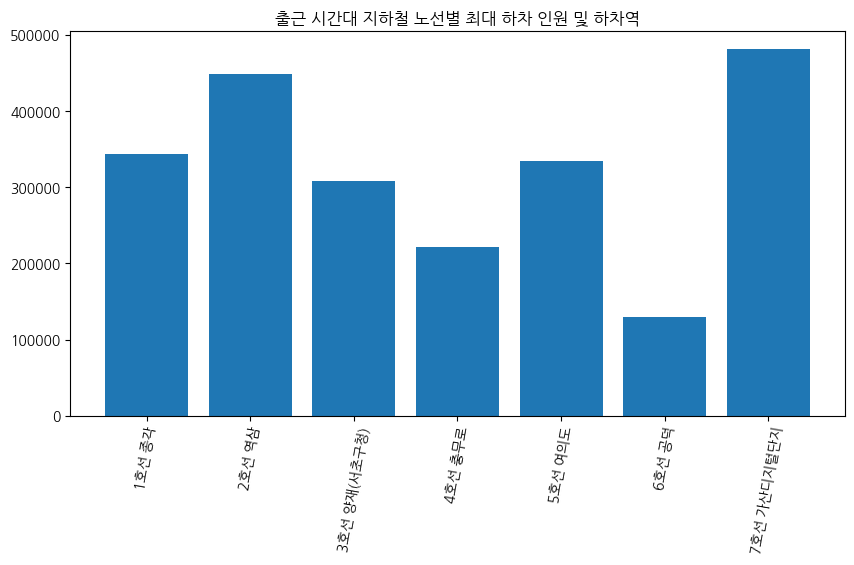

In [5]:
subDF = pd.read_csv('../DATA/subwaytime.csv',usecols=[1,3,11,13], header=0, names=['노선명','지하철명','7시 하차','8시 하차'])
subDF.dropna(inplace=True)

hosubDF = subDF[subDF['노선명'].isin(['1호선','2호선','3호선','4호선','5호선','6호선','7호선'])]
hosubDF['7시 하차'] = hosubDF['7시 하차'].astype('int64')
hosubDF['8시 하차'] = hosubDF['8시 하차'].astype('int64')
hosubDF.set_index('노선명', inplace=True)

yList = []
xList = []

for i in hosubDF.index.unique():
    wantDF = hosubDF.loc[i]
    wantDF['총 하차'] = wantDF['7시 하차'] + wantDF['8시 하차']
    a = wantDF.sort_values(by = '총 하차', ascending=False).iloc[0]
    xList.append(f'{i} {a[0]}')
    yList.append(a[3])
for i in range(7):
    print(f'출근 시간대 {i+1}호선 최대 하차역: {xList[i][4:]}역, 하차인원: {yList[i]:,}명')
    
# 그래프 그리기
plt.figure(figsize=(10,5))
plt.bar(xList,yList)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.xticks(rotation = 80)


### 2번

홍대입구 : 342,962
잠실(송파구청) : 318,474
신림 : 311,267
사당 : 291,686
서울역 : 242,371


Text(0.5, 1.0, '서울 지하철 퇴근 시간대 하차 인원 비교')

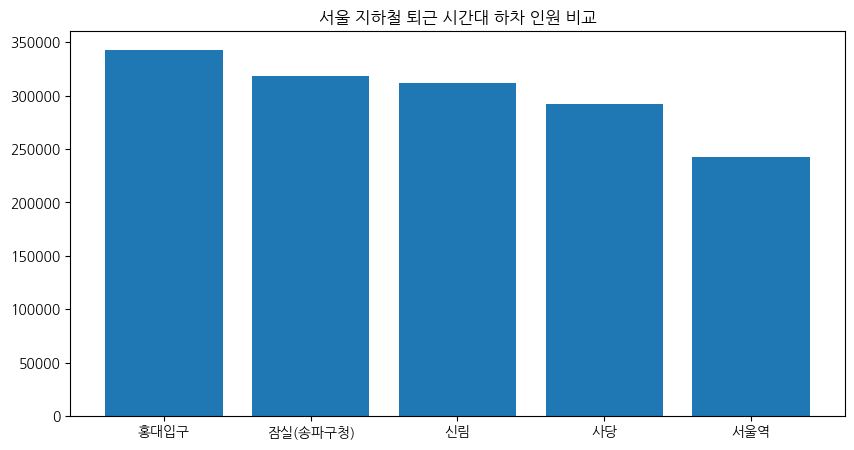

In [6]:
subDF = pd.read_csv('../DATA/subwaytime.csv',usecols=[3,35,37], header=0, names=['지하철명','7시 하차','8시 하차'])
subDF.dropna(inplace=True)
subDF['7시 하차'] = subDF['7시 하차'].astype('int64')
subDF['8시 하차'] = subDF['8시 하차'].astype('int64')
subDF['총 하차'] = subDF['7시 하차'] + subDF['8시 하차']
subDF.set_index('지하철명', inplace=True)

maxDict = {}

for i in subDF.index.unique():
    maxDict[i] = subDF.loc[i,'총 하차'].sum()
    
maxDict = dict(sorted(maxDict.items(), key= lambda x:x[1], reverse=True)[:5])

for k,v in maxDict.items():
    print(f'{k} : {v:,}')

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.bar(maxDict.keys(),maxDict.values())
plt.title('서울 지하철 퇴근 시간대 하차 인원 비교')